In [1]:
from collections import defaultdict
import gzip
import numpy as np
import matplotlib.pyplot as plt

20220719_K562R1


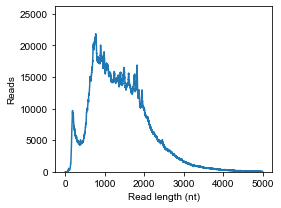

20220719_K562R2


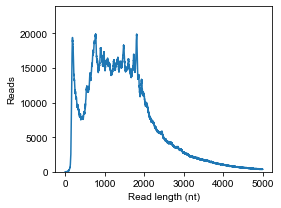

20220719_K562R3


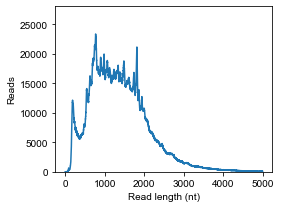

20220719_K562R4


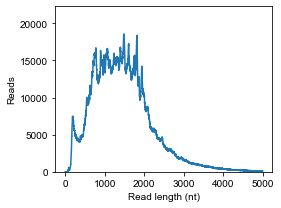

20220729_K562R1


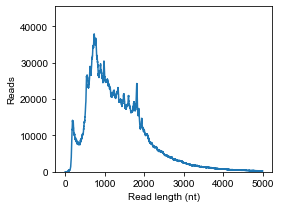

20220729_K562R2


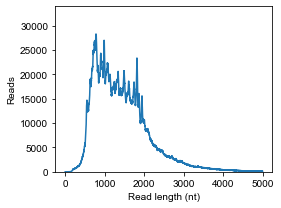

In [2]:
runs = ["20220719_K562R1", "20220719_K562R2", "20220719_K562R3", "20220719_K562R4", "20220729_K562R1", "20220729_K562R2"]

for run in runs:
    print(run)
    path = "../../1_NanoNASCseq/results/qc/read_length/%s.tsv" % run
    counter = defaultdict(int)
    with open(path) as f:
        for i, line in enumerate(f):
            if i == 0:
                continue
            length, count = line.strip("\n").split("\t")
            counter[int(length)] += int(count)
    xs = np.arange(5000)
    ys = [counter[x] for x in xs]
    plt.figure(figsize=(4, 3))
    plt.plot(xs, ys)
    plt.ylim(0, max(ys) * 1.2)
    plt.xlabel("Read length (nt)")
    plt.ylabel("Reads")
    plt.tight_layout()
    plt.show()
    plt.close()

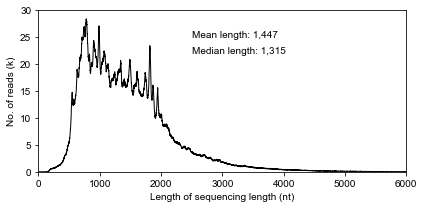

In [3]:
def get_median(counter):
    n1 = 0
    n2 = sum(counter.values()) / 2
    for k, v in sorted(counter.items()):
        n1 += v
        if n1 >= n2:
            return k
        
run = "20220729_K562R2"
path = "../../1_NanoNASCseq/results/qc/read_length/%s.tsv" % run
counter = defaultdict(int)
with open(path) as f:
    for i, line in enumerate(f):
        if i > 0:
            length, count = line.strip("\n").split("\t")
            counter[int(length)] += int(count)
mean = sum([k * v for k, v in counter.items()]) / sum(counter.values())
median = get_median(counter)
xs = np.arange(6000)
ys = np.array([counter[x] for x in xs])
ys = ys / 1e3
plt.figure(figsize=(6, 3))
plt.plot(xs, ys, color="black", lw=1)
plt.text(2500, 25, "Mean length: %s" % format(int(mean), ","))
plt.text(2500, 22, "Median length: %s" % format(int(median), ","))
plt.xlim(0, 6000)
plt.ylim(0, 30)
plt.yticks(np.arange(0, 31, 5))
plt.xlabel("Length of sequencing length (nt)")
plt.ylabel("No. of reads (k)")
plt.tight_layout()
plt.savefig("figures/read_length_distribution.pdf", dpi=300)